## How good is the strategy?

#### Import packages

In [1]:
# import data packages
import pandas as pd
import numpy as np
from scipy.stats import t as t_test
import datetime
import matplotlib.pyplot as plt

In [2]:
#import all bets:
all_bets = pd.read_csv('analysis/results/all_bets2.csv', index_col=0)

In [3]:
ave_bet = 500 / all_bets['Price'].mean()
bets_per_day = 20
daily_bet = bets_per_day * ave_bet
print(f'average money we ar betting per day: {daily_bet}')
returns = .05
daily_profit = daily_bet * returns
print(f'average profit per day: {daily_profit}')
yearly_profit = daily_profit * 365
print(f'average yearly profit: {yearly_profit}')

average money we ar betting per day: 1686.744479035432
average profit per day: 84.3372239517716
average yearly profit: 30783.086742396637


In [4]:
#lets look at all the column names of all bets:
all_bets

,Datetime,Horse,Type,Location,Price,Midpoint Price,Amount,Venue,Midpoint Percentage,WIN_LOSE,BSP,Turnover,Expected Value
0,2023-01-04,Big Time Brynley,RaceType.GREYHOUND_RACE,AUS,1.8,1.734172,1.00,Manawatu,0.963429,0,1.847211,97.444200,-0.025558
1,2023-01-04,Gable,RaceType.GREYHOUND_RACE,AUS,7.0,6.830769,1.00,Gawler,0.975824,0,4.437583,157.743532,0.577435
2,2023-01-04,Chilli On Ice,RaceType.GREYHOUND_RACE,AUS,8.5,8.597143,1.00,Gawler,1.011429,1,10.000000,85.000000,-0.150000
3,2023-01-04,Tabasco Lad,RaceType.GREYHOUND_RACE,AUS,2.6,2.542143,1.00,The Meadows,0.977747,0,2.240000,116.071429,0.160714
4,2023-01-04,Little Olivia,RaceType.GREYHOUND_RACE,AUS,4.8,4.415385,1.00,Taree,0.919872,0,3.165695,151.625486,0.516255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,2023-01-29,Tracer Bullet,RaceType.TROT_RACE,AUS,9.0,8.200000,1.10,Redcliffe,0.911111,0,10.906568,82.519085,-0.174809
968,2023-01-29,My Mate Neo,RaceType.GREYHOUND_RACE,AUS,3.8,3.575000,2.65,Warragul,0.940789,0,2.845668,133.536327,0.335363
969,2023-01-29,Bigsy,RaceType.GREYHOUND_RACE,AUS,9.0,8.050000,1.10,Warragul,0.894444,0,11.271218,79.849403,-0.201506
970,2023-01-29,Get To Work,RaceType.GREYHOUND_RACE,AUS,6.5,6.098361,1.55,Richmond,0.938209,0,5.500000,118.181818,0.181818


#### Manipualte base data

In [5]:
all_bets['midpoint turnover'] = (all_bets['Midpoint Price'] / all_bets['BSP'])
all_bets['midpoint turnover'] = (all_bets['Midpoint Price'] / all_bets['BSP'])
all_bets['profit/loss'] = np.where(all_bets['WIN_LOSE'] == 1, (all_bets['Price'] * 1) - 1, -1)
all_bets['winnings'] = np.where(all_bets['WIN_LOSE'] == 1, (all_bets['Price'] * 1), 0)
all_bets['kelly'] = np.where(all_bets['WIN_LOSE'] == 1, (all_bets['Price'] * 1), 0)
all_bets['implied_probability'] = 1 / all_bets['Price']
#let's filter the data to only observations where the price > midpoint price:
midpoint_strat_profit = all_bets[all_bets['Price'] > all_bets['Midpoint Price']]
profit = sum(all_bets['profit/loss'])
winnings = sum(all_bets['winnings'])
returns = profit / len(all_bets) * 100

# let's group the data by characteristics and see if there is a difference in key metrics:
location_returns = all_bets.groupby('Location')['profit/loss'].sum()
location_returns_n = all_bets.groupby('Location')['Horse'].count()
location_returns_t = all_bets.groupby('Location')['Turnover'].mean()
location_returns_amount = all_bets.groupby('Location')['Amount'].sum()
location_returns = pd.DataFrame(location_returns.sort_values(ascending=False)).merge(location_returns_n, left_index=True, right_index=True)
location_returns = location_returns.merge(location_returns_t, left_index=True, right_index=True)
location_returns = location_returns.merge(location_returns_amount, left_index=True, right_index=True)

venue_returns = all_bets.groupby('Venue')['profit/loss'].sum()
venue_returns_n = all_bets.groupby('Venue')['Horse'].count()
venure_returns_t = all_bets.groupby('Venue')['Turnover'].mean()
venue_returns = pd.DataFrame(venue_returns.sort_values(ascending=False)).merge(venue_returns_n, left_index=True, right_index=True)
venue_returns = venue_returns.merge(venure_returns_t, left_index=True, right_index=True)

race_type_returns = all_bets.groupby('Type')['profit/loss'].sum()
race_type_returns_n = all_bets.groupby('Type')['Horse'].count()
race_type_returns_t = all_bets.groupby('Type')['Turnover'].mean()
race_type_returns_amount = all_bets.groupby('Type')['Amount'].sum()
race_type_returns = pd.DataFrame(race_type_returns.sort_values(ascending=False)).merge(race_type_returns_n, left_index=True, right_index=True)
race_type_returns = race_type_returns.merge(race_type_returns_t, left_index=True, right_index=True)
race_type_returns = race_type_returns.merge(race_type_returns_amount, left_index=True, right_index=True)

aus_type_returns = all_bets.groupby(['Location', 'Type'])['profit/loss'].sum()
aus_type_returns_n = all_bets.groupby(['Location', 'Type'])['Horse'].count()
aus_type_returns_t = all_bets.groupby(['Location', 'Type'])['Turnover'].mean()
aus_type_returns_amount = all_bets.groupby(['Location', 'Type'])['Amount'].sum()
aus_type_returns = pd.DataFrame(aus_type_returns.sort_values(ascending=False)).merge(aus_type_returns_n, left_index=True, right_index=True)
aus_type_returns = aus_type_returns.merge(aus_type_returns_t, left_index=True, right_index=True)
aus_type_returns = aus_type_returns.merge(aus_type_returns_amount, left_index=True, right_index=True)



In [6]:
# let's group the data by price and see if there is a difference in profit/loss and turnover by price:
conditions = [(all_bets['Price'] >= 1) & (all_bets['Price'] < 2),
                (all_bets['Price'] >= 2) & (all_bets['Price'] < 4),
                (all_bets['Price'] >= 4) & (all_bets['Price'] < 6),
                (all_bets['Price'] >= 6) & (all_bets['Price'] < 8),
                (all_bets['Price'] >= 8) & (all_bets['Price'] < 10),
                (all_bets['Price'] >= 10) & (all_bets['Price'] < 12),
                (all_bets['Price'] >= 12) & (all_bets['Price'] < 14),
                (all_bets['Price'] >= 14) & (all_bets['Price'] < 16),
                (all_bets['Price'] >= 16) & (all_bets['Price'] < 18),
                (all_bets['Price'] >= 18) & (all_bets['Price'] < 20),
                (all_bets['Price'] >= 20)]

price_group = ["1-2", "2-4", "4-6", "6-8", "8-10", "10-12", "12-14", "14-16", "16-18", "18-20", "20+"]

all_bets['price_group'] = np.select(conditions, price_group)

price_type_returns = all_bets.groupby('price_group')['profit/loss'].sum()
price_type_returns_n = all_bets.groupby('price_group')['Horse'].count()
price_type_returns_t = all_bets.groupby('price_group')['Turnover'].mean()
price_type_returns_amount = all_bets.groupby('price_group')['Amount'].sum()
price_type_returns = pd.DataFrame(price_type_returns).merge(price_type_returns_n, left_index=True, right_index=True)
price_type_returns = price_type_returns.merge(price_type_returns_t, left_index=True, right_index=True)
price_type_returns = price_type_returns.merge(price_type_returns_amount, left_index=True, right_index=True)

#### How good are our bets thus far?

In [7]:
print(f'From a total of {len(all_bets)} bets, betting $1 on every horse yielded a total profit of: ${profit}')
print(f'This equates to a return on investment (${len(all_bets)} base investment) of: {round(returns, 3)} percent.')

display(aus_type_returns)
display(location_returns)
display(price_type_returns)
display(race_type_returns)
display(venue_returns)

From a total of 972 bets, betting $1 on every horse yielded a total profit of: $-1.4499999999999975
This equates to a return on investment ($972 base investment) of: -0.149 percent.


profit/loss  Horse    Turnover  Amount
Location Type                                                           
AUS      RaceType.GREYHOUND_RACE        32.60    424  104.294222  762.95
         RaceType.TROT_RACE             10.50    227  104.442709  343.10
         RaceType.HORSE_RACE             2.10    230  105.546406  306.70
USA      RaceType.HORSE_RACE           -46.65     91  106.965810  116.50

,profit/loss,Horse,Turnover,Amount
Location,,,,
AUS,45.20,881,104.659385,1412.75
USA,-46.65,91,106.965810,116.50


,profit/loss,Horse,Turnover,Amount
price_group,,,,
1-2,4.40,34,102.069607,72.15
10-12,-24.00,144,108.202982,144.00
2-4,-46.75,213,102.965953,492.50
4-6,-17.10,254,104.251739,425.90
6-8,12.00,197,108.225071,251.25
8-10,70.00,130,101.193710,143.45


,profit/loss,Horse,Turnover,Amount
Type,,,,
RaceType.GREYHOUND_RACE,32.60,424,104.294222,762.95
RaceType.TROT_RACE,10.50,227,104.442709,343.10
RaceType.HORSE_RACE,-44.55,321,105.948791,423.20


,profit/loss,Horse,Turnover
Venue,,,
Horsham,14.90,8,116.715187
Shepparton,14.55,25,98.319256
Doomben,13.50,7,107.130904
Townsville,12.80,14,105.807018
Manawatu,12.00,9,111.547043
...,...,...,...
Ipswich,-8.25,33,103.309712
Taree,-9.45,11,115.548936
Geelong,-15.90,29,105.225036


In [8]:
all_bets['aus_horse_race'] = np.where((all_bets['Location'] == 'AUS') & (all_bets['Type'] == 'RaceType.HORSE_RACE'), 1, 0)
aus_horse_returns_p = all_bets.groupby('aus_horse_race')['profit/loss'].sum()
aus_horse_returns_t = all_bets.groupby('aus_horse_race')['Turnover'].mean()
aus_horse_n = all_bets.groupby('aus_horse_race')['Horse'].count()
aus_horse_returns = pd.DataFrame(aus_horse_returns_p).merge(aus_horse_n, left_index=True, right_index=True)
aus_horse_returns = aus_horse_returns.merge(aus_horse_returns_t, left_index=True, right_index=True)
aus_horse_returns



,profit/loss,Horse,Turnover
aus_horse_race,,,
0,-3.55,742,104.667296
1,2.10,230,105.546406


### Unlucky, or BSP not all its cracked up to be?

2.251833064252938
0.48681612455294765
0.04875315854944029


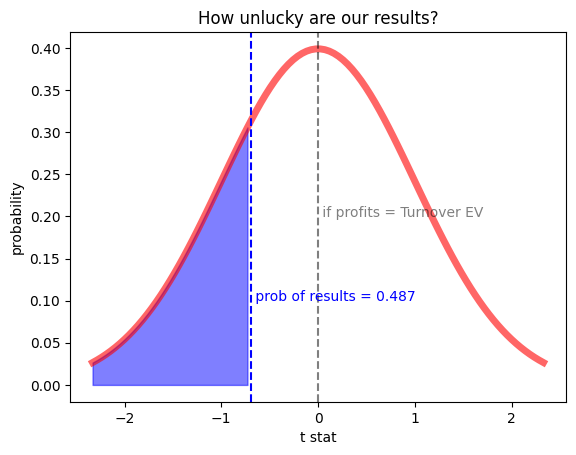

In [9]:
mean = all_bets['profit/loss'].mean()
sigma = all_bets['profit/loss'].std()
print(sigma)
n = len(all_bets)
dof = n -1
mu = (all_bets['Turnover'].mean() / 100) - 1
#t test:
t = (mean - mu) / (sigma / np.sqrt(n))
t_test.cdf(t, dof)
p_value = 2*(1 - t_test.cdf(abs(t), dof))
print(p_value)
print(mu)
# now we plot out a t distribution centering on the mean of our sample:
x = np.linspace(t_test.ppf(0.01, dof), t_test.ppf(0.99, dof), 100)
plt.plot(x, t_test.pdf(x, dof), 'r-', lw=5, alpha=0.6, label='t pdf')
#lets add a vertical line at p_value:
plt.axvline(x=t, color='b', linestyle='--', label='t value')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
#let's label the vertical line:
plt.text(t, 0.1, f' prob of results = {round(p_value, 3)}', color = 'b')
plt.text(0, 0.2, f' if profits = Turnover EV', alpha = 0.5)
# let's colour the area under the curve to the left of the t value:
plt.fill_between(x, t_test.pdf(x, dof), where=x<t, color='b', alpha=0.5)
plt.title('How unlucky are our results?')
plt.xlabel('t stat')
plt.ylabel('probability')
plt.show()

#### Simulating risk 
assumptions:
we take a sample from some distribution of bets following our rule - some will lose, some will win with some distribution. 
The mean profit/loss of that sample (if all equal weighted bets) will follow a normal distribution from the C.L.T. 


#### How indicative of the BSP is the midpoint price?

On average the midpoint price is $-513.9 off from the BSP


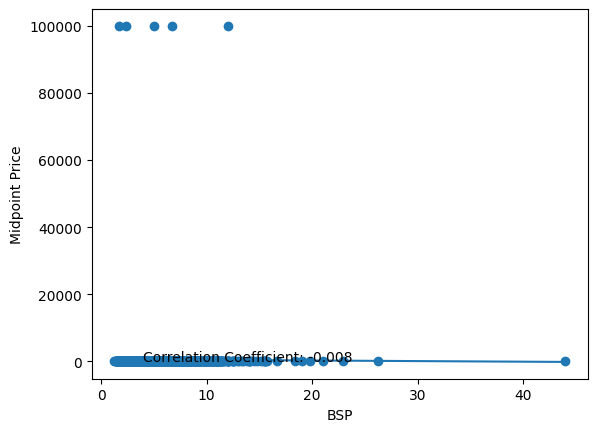

In [10]:
# Let's calculate how far off the midpoint price is from BSP
all_bets['midpoint difference'] = all_bets['BSP'] - all_bets['Midpoint Price']
sum(all_bets['midpoint difference'])

# lets plot the correlation of the BSp with the midpoint price in the all_bets df using matplot lib:
plt.scatter(all_bets['BSP'], all_bets['Midpoint Price'])
plt.xlabel('BSP')
plt.ylabel('Midpoint Price')
plt.plot(np.unique(all_bets['BSP']), np.poly1d(np.polyfit(all_bets['BSP'], all_bets['Midpoint Price'], 1))(np.unique(all_bets['BSP'])))
plt.text(4, 1.5, f'Correlation Coefficient: {round(np.corrcoef(all_bets["BSP"], all_bets["Midpoint Price"])[0,1], 3)}')
print(f'On average the midpoint price is ${round(np.mean(all_bets["midpoint difference"]), 3)} off from the BSP')

#### How indicative of the BSP is the Betr price?

On average the betr price is $0.036 off from the BSP


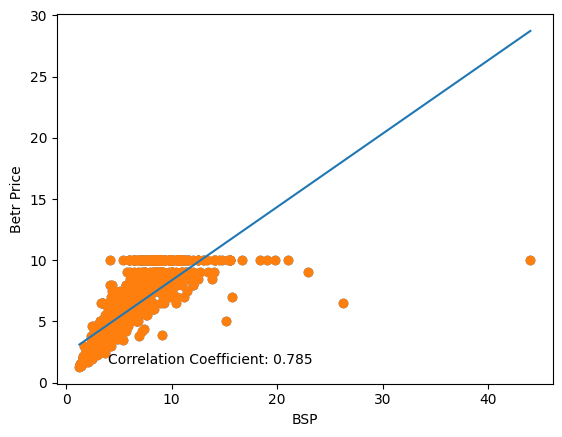

In [11]:
all_bets['betr difference'] = all_bets['BSP'] - all_bets['Price']
sum(all_bets['betr difference'])

# lets plot the correlation of the BSP with the price in the all_bets df using matplot lib:
plt.scatter(all_bets['BSP'], all_bets['Price'])
plt.scatter(all_bets['BSP'], all_bets['Price'])
plt.xlabel('BSP')
plt.ylabel('Betr Price')
plt.plot(np.unique(all_bets['BSP']), np.poly1d(np.polyfit(all_bets['BSP'], all_bets['Price'], 1))(np.unique(all_bets['BSP'])))
plt.text(4, 1.5, f'Correlation Coefficient: {round(np.corrcoef(all_bets["BSP"], all_bets["Price"])[0,1], 3)}')
print(f'On average the betr price is ${round(np.mean(all_bets["betr difference"]), 3)} off from the BSP')

#### How good would of betting with the Kelly Criterion been?

Thus far we have assumed we made \\$1 bets for every horse - but what if the bet size was a function of the implied probability we derive from the price. The below code sees how well we would of done using the kelly criterion for stake sizes assuming we initially placed \\$100 in. 

Text(0, 1200, 'initial stake: $100')

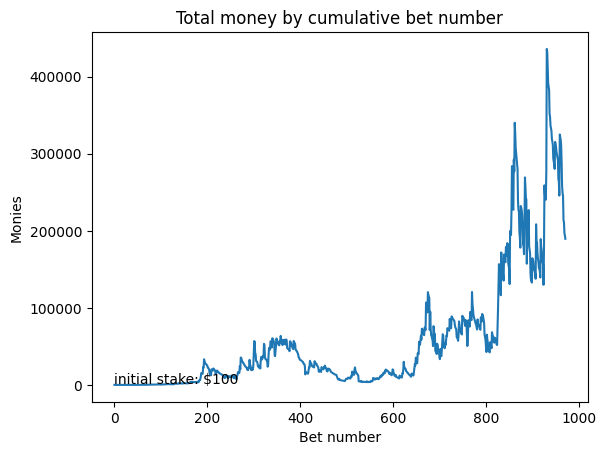

In [12]:
initial_stake = 100
bets = len(all_bets)
monies_array = [initial_stake]

def kelly_fraction(prob, prop_bet_gained):
  return ((prob) - ((1 - prob)) / prop_bet_gained) # need to check correct formula two sites differerd.

for bet in range(1,bets):
    index = bet - 1 
    prob = all_bets['implied_probability'][index]
    price = all_bets['Price'][index]
    prop_bet_gained = (price*1) /1
    kelly_frac = kelly_fraction(prob, prop_bet_gained)
    kelly = kelly_frac * monies_array[-1]

    if all_bets['WIN_LOSE'][index] == 1:
        total_purse = monies_array[-1] + (price * kelly)
        monies_array.append(total_purse)
    else:
        total_purse = monies_array[-1] - (kelly)
        monies_array.append(total_purse)

plt.plot(monies_array)
#lets add axis titles and labels:
plt.xlabel('Bet number')
plt.ylabel('Monies')
plt.title('Total money by cumulative bet number')
plt.text(0, 1200, f'initial stake: ${initial_stake}')

### *below is Ben playing around*

#### Profit from all bets- assuming BSP is long run probability. 

In [13]:
print(f'From a total of ({len(all_bets)} bets) the overall turnover for all our bets is: {all_bets.Turnover.mean()}.')
print(f'This would equate to a profit of {round(all_bets.Turnover.mean() * 100 - 100, 3)} percent- (assuming BSP is accurate in long run)')



From a total of (972 bets) the overall turnover for all our bets is: 104.87531585494403.
This would equate to a profit of 10387.532 percent- (assuming BSP is accurate in long run)


#### Profit if we had only bet when the price was better than the midpoint price:

In [14]:
print(f'From a total of ({len(midpoint_strat_profit)} bets) the overall turnover for all our bets is: {midpoint_strat_profit.Turnover.mean()}.')
print(f'This equates to a profit of {round(midpoint_strat_profit.Turnover.mean() * 100 - 100, 3)} percent.')

From a total of (943 bets) the overall turnover for all our bets is: 104.71779558657299.
This equates to a profit of 10371.78 percent.
